# Analysis Introduction

In this analysis, data on the revenue of customers of a grocery delivery company is analyzed. The dataset includes multiple attributes of purchasing behavior and interactions on the company’s platform. The goal is to develop a model which predicts the revenue of customers based on their metrics as accurate as possible. To achieve this goal, the attributes of the dataset are transformed, combined, and new ones are engineered. Different models are compared with different inputs to determine which model in which configuration has the highest predictive power.

<br>

In [1]:
# importing libraries
import pandas as pd                  
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns                 
from os import listdir 
import statsmodels.formula.api as smf               
from sklearn.model_selection import train_test_split 
import sklearn.linear_model 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)


# specifying file name
file = './Grocery_Getters.xlsx'


# reading the file into Python
grocery_df = pd.read_excel(io = file)


# outputting the first 5 rows of the dataset
grocery_df.head(n=5)

,Name,Email,First_Name,Family_Name,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
0,Anguy,anguy@boeing.com,Anguy,Anguy,5194.875,7481,144,10,19,2,6,2,0,0,168.9,47.0,2.368421,5
1,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,5355.000,3492,62,43,18,3,6,1,0,0,238.5,31.0,2.631579,275
2,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,2940.000,3588,218,10,13,1,5,2,8,0,143.0,53.0,2.894737,16
3,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,7087.500,1500,117,12,13,0,6,2,0,8,169.4,39.0,2.631579,302
4,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,6562.500,6358,19,301,13,1,5,1,0,9,187.4,48.0,2.631579,310


<br>

# Exploratory Data Analysis and Data Preprocessing

For the regression model, only numeric values can be considered. Therefore, the non-numeric columns are dropped from the dataset. <br>
<br>
It is checked whether the columns that have zeroes as values have enough non-zero values to be considered in the analysis.
The columns that have zeroes as values are checked for validity to be included in the analysis since there needs to be a representativeness of values greater than zero. The result is that all features that have zeroes as values can be included. <br>
<br>
Many features have skewness. In linear modeling, skewness will disturb the model due to its extreme values. Measures of central tendency with a normal distribution are preferred for linear modeling. To cancel out this skewness, a logarithmic transformation is applied to the respective features. <br>
<br>
The dataset in its original form has many features with weak or no correlation to the REVENUE or log_REVENUE. For that reason, new features are engineered using the existing ones to create higher correlations that lead to a better predictive model.


<br>

In [2]:
# calling info 
grocery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1946 non-null   object 
 1   Email                         1946 non-null   object 
 2   First_Name                    1946 non-null   object 
 3   Family_Name                   1900 non-null   object 
 4   REVENUE                       1946 non-null   float64
 5   Total_Products_Ordered        1946 non-null   int64  
 6   Product_Categories_Purchased  1946 non-null   int64  
 7   Total_Brands_Purchased        1946 non-null   int64  
 8   Customer_Service_Inqueries    1946 non-null   int64  
 9   Total_Products_Returned       1946 non-null   int64  
 10  Web_Logins                    1946 non-null   int64  
 11  App_Logins                    1946 non-null   int64  
 12  Total_Weeks_Premium           1946 non-null   int64  
 13  Lat

In [3]:
# calling descriptive statistics on dataset
grocery_df.describe().round(decimals=3)

,REVENUE,Total_Products_Ordered,Product_Categories_Purchased,Total_Brands_Purchased,Customer_Service_Inqueries,Total_Products_Returned,Web_Logins,App_Logins,Total_Weeks_Premium,Late_Deliveries,Avg_Time_Per_Visit,Avg_Clicks_Per_Visit,Avg_Product_Rating,Total_Product_Interactions
count,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000,1946.000
mean,2107.293,2038.927,127.989,23.746,4.905,1.571,5.516,1.476,11.330,2.053,150.557,99.605,3.555,113.152
std,1138.291,1557.024,136.006,97.489,2.502,1.611,0.581,0.528,13.573,3.789,49.447,62.342,0.614,177.152
min,131.000,160.000,1.000,1.000,1.000,0.000,4.000,0.000,0.000,0.000,33.400,10.330,1.316,1.000
25%,1350.000,942.250,39.000,4.000,3.000,0.000,5.000,1.000,1.000,0.000,114.400,72.000,3.158,10.000
50%,1740.000,1686.000,87.500,8.000,5.000,1.000,6.000,1.000,7.000,0.000,145.600,94.160,3.421,17.000
75%,2670.000,2594.000,172.000,16.000,7.000,2.000,6.000,2.000,13.000,3.000,173.775,117.288,3.947,174.000
max,8793.750,14958.000,1611.000,3298.000,19.000,13.000,7.000,3.000,52.000,18.000,564.200,1645.600,5.000,1600.000


In [4]:
#checking for missing values
grocery_df.isnull().mean().round(3)

Name                            0.000
Email                           0.000
First_Name                      0.000
Family_Name                     0.024
REVENUE                         0.000
Total_Products_Ordered          0.000
Product_Categories_Purchased    0.000
Total_Brands_Purchased          0.000
Customer_Service_Inqueries      0.000
Total_Products_Returned         0.000
Web_Logins                      0.000
App_Logins                      0.000
Total_Weeks_Premium             0.000
Late_Deliveries                 0.000
Avg_Time_Per_Visit              0.000
Avg_Clicks_Per_Visit            0.000
Avg_Product_Rating              0.000
Total_Product_Interactions      0.000
dtype: float64

In [5]:
# dropping non-numeric attributes
grocery_df = grocery_df.drop(columns = ['Name', 'Email', 'First_Name', 'Family_Name'])

In [6]:
# checking number of zeroes for the columns that 
# have a min value of 0 in the descriptive statistics

returned_zeroes = len(grocery_df['Total_Products_Returned'][grocery_df['Total_Products_Returned'] == 0]) 
app_zeroes      = len(grocery_df['App_Logins'][grocery_df['App_Logins'] == 0])
premium_zeroes  = len(grocery_df['Total_Weeks_Premium'][grocery_df['Total_Weeks_Premium'] == 0])
late_zeroes     = len(grocery_df['Late_Deliveries'][grocery_df['Late_Deliveries'] == 0])


# printing a table of the results
print(f"""
                      No\tYes
                     ----------------
Products Returned   | {returned_zeroes}\t{len(grocery_df) - returned_zeroes}
App Logings         | {app_zeroes}\t{len(grocery_df) - app_zeroes}
Weeks Premium       | {premium_zeroes}\t{len(grocery_df) - premium_zeroes}
Late Deliveries     | {late_zeroes}\t{len(grocery_df) - late_zeroes}
""")


                      No	Yes
                     ----------------
Products Returned   | 572	1374
App Logings         | 16	1930
Weeks Premium       | 468	1478
Late Deliveries     | 1433	513



<br>

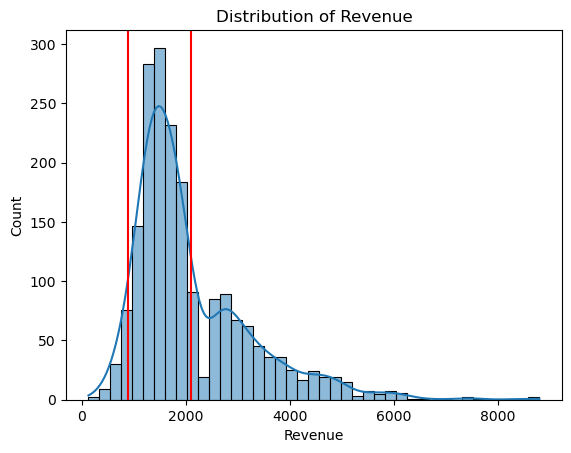

In [7]:
# histogram of revenue
sns.histplot(data  = grocery_df,
             x     = 'REVENUE',
             kde   = True)


# title and axis labels
plt.title(label   = "Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") 
plt.ylabel(ylabel = "Count")
plt.axvline(900, color='red')
plt.axvline(2100, color='red')


# showing histogram
plt.show()

The histogram of the revenue metric counts how often a respective revenue occurs in the dataset. The plot shows that most customers spend between USD 900 and USD 2100. Though, the histogram is skewed to the right which means that some customers spend way more than USD 2100 with a decreasing amount the higher the revenue gets. On the other hand, only few customers spend less than USD 900. The histogram shows an exponential distribution. This indicates a high variance in the data. For linear models, the goal is to create measures of central tendency with little variance. Therefore, the revenue metric needs transformation to align it closer to a normal distribution.

<br>

In [8]:
# log transforming REVENUE and saving it to dataset
grocery_df['log_REVENUE'] = np.log1p(grocery_df['REVENUE'])

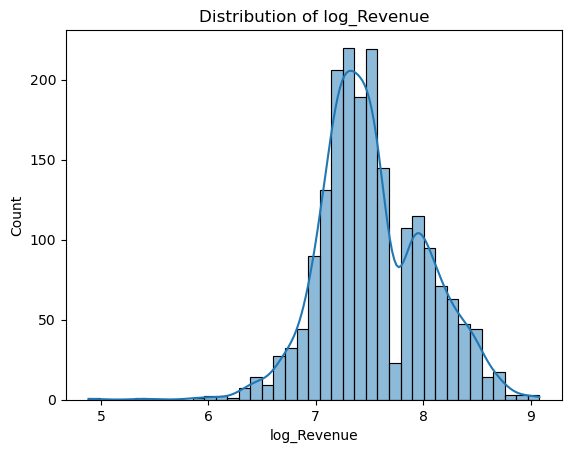

In [9]:
# histogram of revenue
sns.histplot(data  = grocery_df,
             x     = 'log_REVENUE',
             kde   = True)


# title and axis labels
plt.title(label   = "Distribution of log_Revenue")
plt.xlabel(xlabel = "log_Revenue") 
plt.ylabel(ylabel = "Count")


# showing histogram
plt.show()

After applying the logarithmic transformation to revenue, the histogram looks more like a normal distribution. The distribution keeps its original form, and the data is still slightly skewed positive. Though, the variance gets minimized as the logarithmic transformation cancels out exponential distributions. The values on the x-axis show that the range of values is smaller than in the previous plot. This comparison between the two histograms shows the effect of a logarithmic transformation to keep in mind for the rest of this analysis.

<br>

In [10]:
# instatiating correlation of dataset
grocery_corr = grocery_df.corr(method = 'pearson').round(3)

In [11]:
grocery_corr.loc[ : , ['REVENUE', 'log_REVENUE'] ].round(2).sort_values(by = 'REVENUE',
                                                                        ascending = False)

,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
Total_Products_Ordered,0.72,0.68
Avg_Time_Per_Visit,0.64,0.65
Product_Categories_Purchased,0.50,0.48
Total_Product_Interactions,0.46,0.43
Customer_Service_Inqueries,0.17,0.18
Avg_Clicks_Per_Visit,0.14,0.14
App_Logins,0.07,0.08
Web_Logins,0.02,0.01


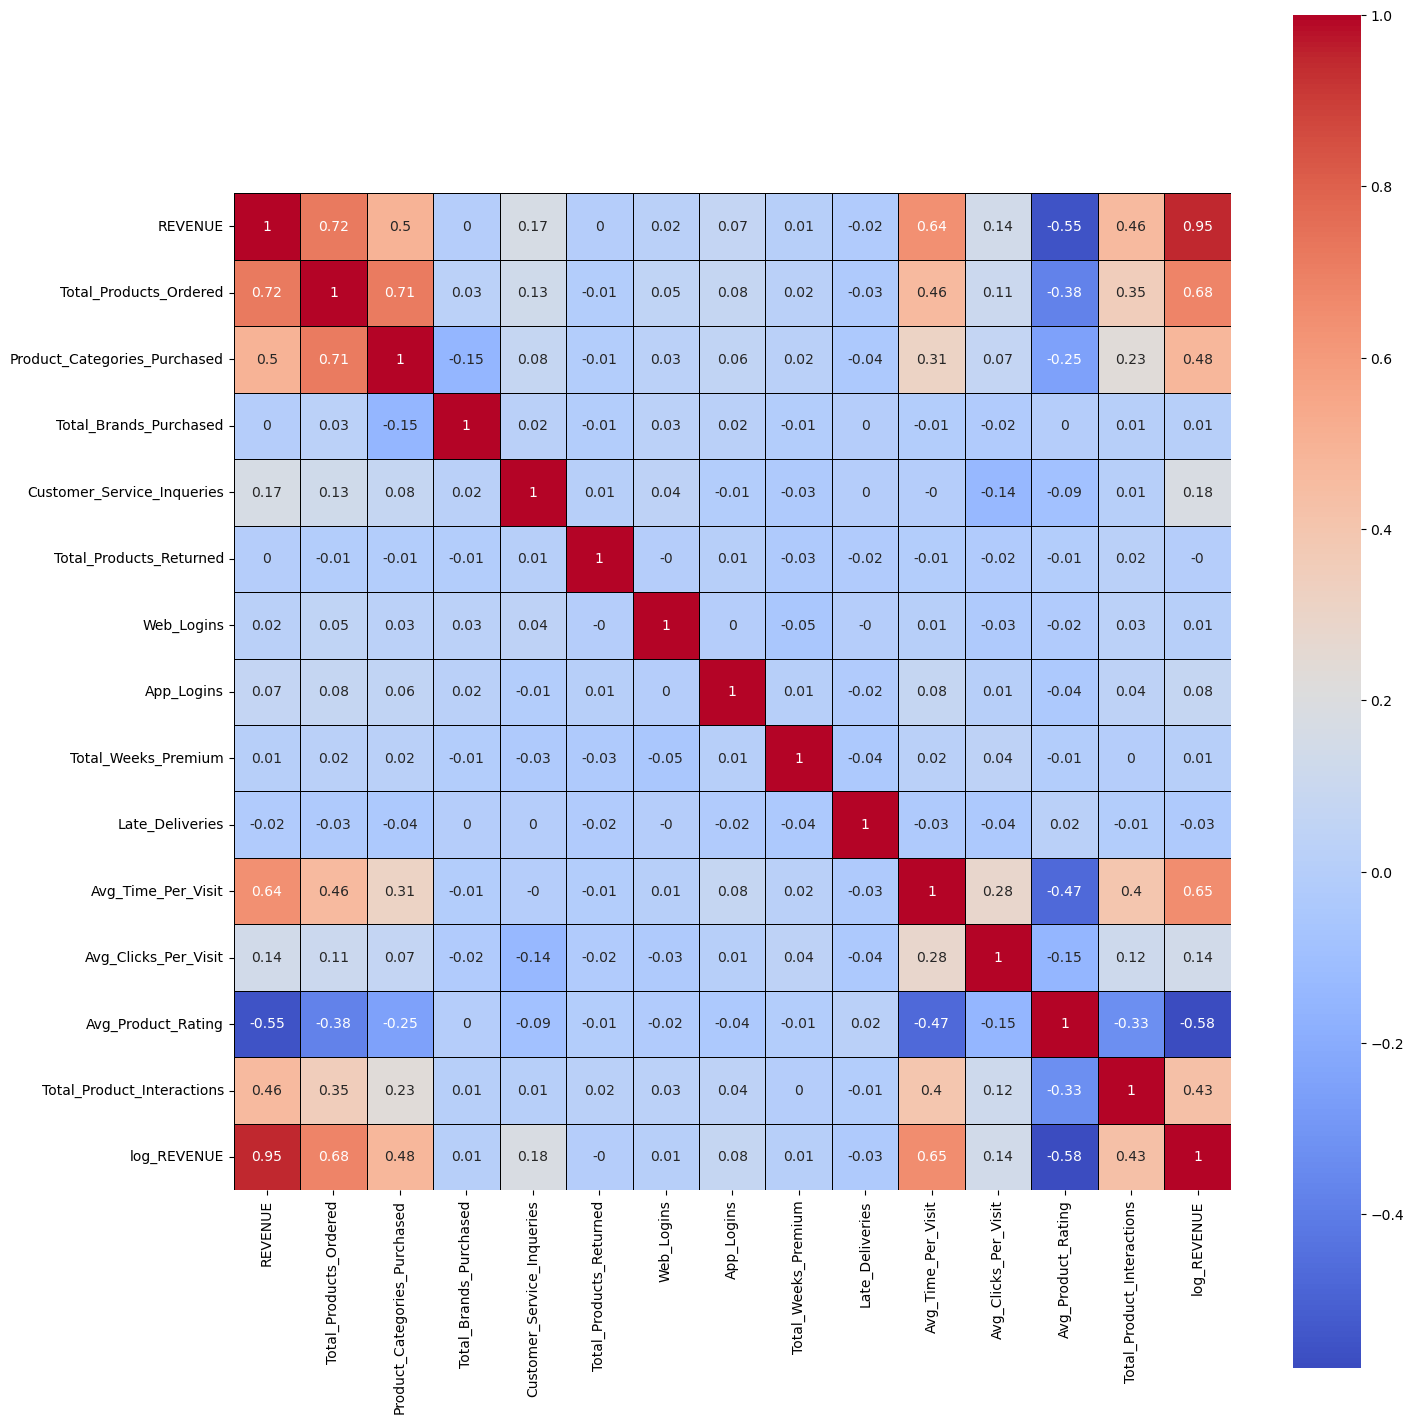

In [12]:
# instantiating a correlation matrix
df_corr = grocery_df.corr().round(2)


# setting figure size
fig, ax = plt.subplots(figsize=(15,15))


# visualizing the correlation matrix
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


# layout and rendering
plt.tight_layout()
plt.show()

This heatmap shows the correlations between all features in the dataset. The dark red fields indicating a strong positive correlation and the dark blue fields indicating a strong negative correlation. Many features have a weak or no correlation with revenue and log_revenue. Only few features have a strong correlation (positive and negative). The number of total products ordered has the strongest positive correlation while the average product rating has the strongest negative correlation with revenue and log_revenue.

<br>

In [13]:
## BASE MODEL ##

# instantiating model object
lm_best = smf.ols(formula = """REVENUE ~ Total_Products_Ordered +
                                         Avg_Time_Per_Visit +
                                         Total_Product_Interactions + 
                                         Customer_Service_Inqueries +
                                         Avg_Product_Rating """,
                             data = grocery_df)

# fit data into model object
results_lm_best = lm_best.fit()

# summary output
print(results_lm_best.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     901.5
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:37:31   Log-Likelihood:                -15287.
No. Observations:                1946   AIC:                         3.059e+04
Df Residuals:                    1940   BIC:                         3.062e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [14]:
#checking skewness of x-features
grocery_df.iloc[:,:].skew(axis = 0).round(decimals = 2)

REVENUE                          1.63
Total_Products_Ordered           1.97
Product_Categories_Purchased     2.85
Total_Brands_Purchased          22.16
Customer_Service_Inqueries       0.37
Total_Products_Returned          1.44
Web_Logins                      -0.04
App_Logins                       0.05
Total_Weeks_Premium              1.54
Late_Deliveries                  1.71
Avg_Time_Per_Visit               1.20
Avg_Clicks_Per_Visit             9.64
Avg_Product_Rating              -0.11
Total_Product_Interactions       2.60
log_REVENUE                      0.19
dtype: float64

In [15]:
# logarithmic transformation of x-features with a skewness greater than 1.00
grocery_df['log_Total_Products_Ordered']       = np.log1p(grocery_df['Total_Products_Ordered'])
grocery_df['log_Product_Categories_Purchased'] = np.log1p(grocery_df['Product_Categories_Purchased'])
grocery_df['log_Total_Brands_Purchased']       = np.log1p(grocery_df['Total_Brands_Purchased'])
grocery_df['log_Total_Products_Returned']      = np.log1p(grocery_df['Total_Products_Returned'])
grocery_df['log_Total_Weeks_Premium']          = np.log1p(grocery_df['Total_Weeks_Premium'])
grocery_df['log_Late_Deliveries']              = np.log1p(grocery_df['Late_Deliveries'])
grocery_df['log_Avg_Time_Per_Visit']           = np.log1p(grocery_df['Avg_Time_Per_Visit'])
grocery_df['log_Avg_Clicks_Per_Visit']         = np.log1p(grocery_df['Avg_Clicks_Per_Visit'])
grocery_df['log_Total_Product_Interactions']   = np.log1p(grocery_df['Total_Product_Interactions'])

In [16]:
grocery_df.loc[:,'log_REVENUE':].skew(axis = 0).round(decimals = 2)

log_REVENUE                         0.19
log_Total_Products_Ordered         -0.21
log_Product_Categories_Purchased   -0.66
log_Total_Brands_Purchased          1.03
log_Total_Products_Returned         0.14
log_Total_Weeks_Premium            -0.18
log_Late_Deliveries                 1.20
log_Avg_Time_Per_Visit             -0.06
log_Avg_Clicks_Per_Visit           -0.45
log_Total_Product_Interactions      0.46
dtype: float64

In [17]:
grocery_corr_new = grocery_df.corr(method = 'pearson').round(3)
grocery_corr_new.loc[ : , 'REVENUE'].round(2).sort_values(ascending = False)

REVENUE                             1.00
log_REVENUE                         0.95
Total_Products_Ordered              0.72
Avg_Time_Per_Visit                  0.64
log_Avg_Time_Per_Visit              0.63
log_Total_Products_Ordered          0.62
Product_Categories_Purchased        0.50
Total_Product_Interactions          0.46
log_Total_Product_Interactions      0.43
log_Product_Categories_Purchased    0.38
Customer_Service_Inqueries          0.17
log_Avg_Clicks_Per_Visit            0.15
Avg_Clicks_Per_Visit                0.14
App_Logins                          0.07
Web_Logins                          0.02
log_Total_Brands_Purchased          0.02
Total_Weeks_Premium                 0.01
log_Total_Products_Returned         0.01
Total_Products_Returned             0.00
Total_Brands_Purchased              0.00
log_Total_Weeks_Premium            -0.01
Late_Deliveries                    -0.02
log_Late_Deliveries                -0.02
Avg_Product_Rating                 -0.55
Name: REVENUE, d

<br>

# Feature Engineering

In [18]:
# binary features for features that have 0 values
grocery_df['has_Premium'] = 0
grocery_df['has_Returned'] = 0
grocery_df['has_Late_Deliveries'] = 0


#for loop with iterroe to go over every row
for index, value in grocery_df.iterrows():

    # Premium
    if grocery_df.loc[index, 'Total_Weeks_Premium'] > 0:
        grocery_df.loc[index, 'has_Premium'] = 1
        
    # Products Returned
    if grocery_df.loc[index, 'Total_Products_Returned'] > 0:
        grocery_df.loc[index, 'has_Returned'] = 1
        
    # Late Deliveries
    if grocery_df.loc[index, 'Late_Deliveries'] > 0:
        grocery_df.loc[index, 'has_Late_Deliveries'] = 1

<br>

## Feature 1: Norm_Engagement_Score

This feature combines the average time per visit, the average clicks per visit, and the total product interaction. It creates a score that explains the engagement of a customer with the platform and the products. A higher score indicates that a customer spends more time and browses more on the platform, interacting with more products. A lower score indicates the opposite. The correlation with revenue and log_revenue show that engaged customers tend to spend more money.

In [19]:
## FEATURE 1 ##
# Creating new column for feature "Norm_Engagement_Score"

# normalizing avg_time, avg_clicks, and total_interactions to not mix units
scaler = MinMaxScaler()

# Normalize the three features
grocery_df[['Norm_Time', 'Norm_Clicks', 'Norm_Interactions']] = \
scaler.fit_transform(grocery_df[['Avg_Time_Per_Visit', 'Avg_Clicks_Per_Visit', 'Total_Product_Interactions']])

# instantiating the new feature
grocery_df['Norm_Engagement_Score'] = (grocery_df['Norm_Time'] +
                                       grocery_df['Norm_Clicks'] +
                                       grocery_df['Norm_Interactions'])


# creating correlations with REVENUE and log_REVENUE
norm_engagement_corr1 = grocery_df.loc[:, 'Norm_Engagement_Score'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
norm_engagement_corr2 = grocery_df.loc[:, 'Norm_Engagement_Score'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)

# printing result of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{norm_engagement_corr1}
log_Revenue:\t{norm_engagement_corr2}
""")


CORRELATION 
-----------
Revenue:	0.636
log_Revenue:	0.618



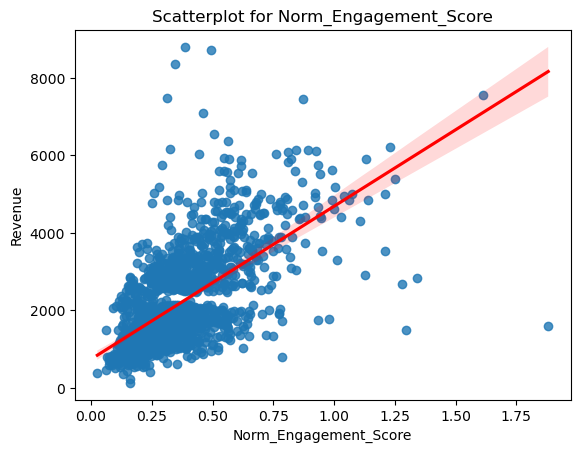

In [20]:
# scatterplot with trendline for "Norm_Engagement_Score"
sns.regplot(x    = 'Norm_Engagement_Score',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Norm_Engagement_Score')
plt.xlabel(xlabel = 'Norm_Engagement_Score')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

The scatterplot shows the relationship between the engineered feature, Norm_Engagement_Score, and revenue. The red line visualizes the relationship between engagement and revenue. For the bulk of the values, a linear relationship can be seen. Outliers in engagement and revenue add some variance that cannot be avoided. The normalization shows its effect by compressing the values to a small scale which improves the linear relationship.

<br>

## Feature 2: Purchase_Score

This feature explains how much and how diverse a customer buys. A higher score indicates that a customer orders frequently and across different brands and products. This feature helps to differentiate customers who buy in bulk and variety-driven from selective and occasional buyers. The logarithmic transformation of the components was chosen to create a normal distribution with less variance and a score on a smaller scale. To not have the number of products ordered as the main driver of this feature, the brands and categories are multiplied with each other and added to the number of products ordered.

In [21]:
## Feature 2 ##
# Instantiating feature 'Purchase_Score'
grocery_df['Purchase_Score'] = ((grocery_df['log_Product_Categories_Purchased'] +
                                grocery_df['log_Total_Brands_Purchased']) *
                                grocery_df['log_Total_Products_Ordered'])


# creating correlation with REVENUE and log_REVENUE
purchase_corr1 = grocery_df.loc[:, 'Purchase_Score'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
purchase_corr2 = grocery_df.loc[:, 'Purchase_Score'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{purchase_corr1}
log_Revenue:\t{purchase_corr2}
""")


CORRELATION 
-----------
Revenue:	0.59
log_Revenue:	0.605



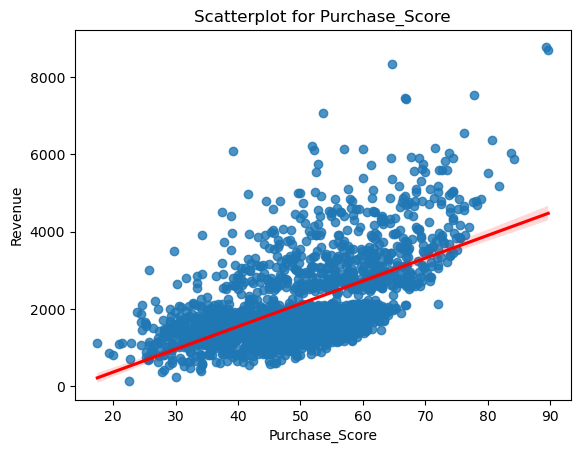

In [22]:
# scatterplot with trendline for "Purchase_Score"
sns.regplot(x    = 'Purchase_Score',
            y    = 'REVENUE' ,
            data = grocery_df,
            line_kws={"color": "red"})


# titles and axis labels
plt.title(label   = 'Scatterplot for Purchase_Score')
plt.xlabel(xlabel = 'Purchase_Score')
plt.ylabel(ylabel = 'Revenue')


# displaying the plot
plt.show()

This scatterplot of revenue and purchase score show a slightly exponential distribution. Even though the logarithmic transformation was applied for to engineer the purchase score feature, the exponential distribution could not be leveled out completely. Nevertheless, the logarithmic transformation shows its effect by compressing the values to a smaller scale. The plot clearly shows and increase in revenue as the purchase score increases.  While the slope of the red line is not as high as in the engagement scatterplot, this plot shows that there is less variance due to outliers in either revenue or purchase score.

<br>

## Feature 3: Rating_v_Engagement

This feature explains whether the revenue coming from a customer is more driven by the rating of a product, or how much they engage with the platform. Customers with higher scores have less engagement and prefer higher rated products. They are picky shoppers and make quick, calculated purchases. Customer with lower scores spend more time browsing. Even if they buy lower-rated products, their overall spending is higher. Using this feature, customers can be classified into “Impulse Buyer” (low score) and “Cautious Buyer” (high score) who trust products that are higher rated and buy selectively.

In [23]:
## Feature 3 ##
# Instantiating new feature 'Rating_v_Engagement'
grocery_df['Rating_v_Engagement'] = (grocery_df['Avg_Product_Rating']/
                                    (grocery_df['Norm_Engagement_Score']))

                            

# creating correlation with REVENUE and log_REVENUE                                 
rating_corr1 = grocery_df.loc[:, 'Rating_v_Engagement'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
rating_corr2 = grocery_df.loc[:, 'Rating_v_Engagement'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{rating_corr1}
log_Revenue:\t{rating_corr2}
""")



CORRELATION 
-----------
Revenue:	-0.517
log_Revenue:	-0.599



<br>

## Feature 4: Diversity_Index

This feature explains how diverse customers buy across different brands and product categories. As diversity increases, revenue tends to increase as well. Customers who buy across multiple brands and categories are most likely engaged shoppers. They spend more time exploring and are keen to buy impulsively. It does not indicate how many products are being bought, but it is indicator that customers that buy more diverse tend to spend more. A low index are loyal shoppers only buy a few selected brands and categories. They do not explore much and most likely less engaged and buy “from a shopping list”. This feature further helps segmenting customers. 

In [24]:
## Feature 4 ##
#create feature for Diversity_Index
grocery_df['Diversity_Index'] = (grocery_df['log_Product_Categories_Purchased'] + 
                                  grocery_df['log_Total_Brands_Purchased']) / 2
    
# creating correlation with REVENUE and log_REVENUE                                 
diversity_corr1 = grocery_df.loc[:, 'Diversity_Index'].corr(grocery_df.loc[:, 'REVENUE']).round(3)
diversity_corr2 = grocery_df.loc[:, 'Diversity_Index'].corr(grocery_df.loc[:, 'log_REVENUE']).round(3)


# printing results of correlations
print(f"""
CORRELATION 
-----------
Revenue:\t{diversity_corr1}
log_Revenue:\t{diversity_corr2}
""")


CORRELATION 
-----------
Revenue:	0.475
log_Revenue:	0.493



<br>

In [25]:
# checking skewness for all features in the dataset
grocery_df.iloc[:,:].skew(axis = 0).sort_values(ascending=True).round(decimals = 2)

has_Premium                         -1.22
has_Returned                        -0.91
log_Product_Categories_Purchased    -0.66
log_Avg_Clicks_Per_Visit            -0.45
Diversity_Index                     -0.37
log_Total_Products_Ordered          -0.21
log_Total_Weeks_Premium             -0.18
Avg_Product_Rating                  -0.11
log_Avg_Time_Per_Visit              -0.06
Web_Logins                          -0.04
App_Logins                           0.05
Purchase_Score                       0.10
log_Total_Products_Returned          0.14
log_REVENUE                          0.19
Customer_Service_Inqueries           0.37
log_Total_Product_Interactions       0.46
log_Total_Brands_Purchased           1.03
has_Late_Deliveries                  1.07
log_Late_Deliveries                  1.20
Avg_Time_Per_Visit                   1.20
Norm_Time                            1.20
Total_Products_Returned              1.44
Total_Weeks_Premium                  1.54
REVENUE                           

In [26]:
# create new correlation with all features
grocery_corr_new = grocery_df.corr(method='pearson').round(3)

# Filter correlation to 'REVENUE' and 'log_REVENUE'
grocery_corr_new.loc[ : , ['REVENUE', 'log_REVENUE'] ].round(2).sort_values(by = 'REVENUE',
                                                                            ascending = False)


,REVENUE,log_REVENUE
REVENUE,1.00,0.95
log_REVENUE,0.95,1.00
Total_Products_Ordered,0.72,0.68
Avg_Time_Per_Visit,0.64,0.65
Norm_Engagement_Score,0.64,0.62
Norm_Time,0.64,0.65
log_Avg_Time_Per_Visit,0.63,0.67
log_Total_Products_Ordered,0.62,0.65
Purchase_Score,0.59,0.60
Product_Categories_Purchased,0.50,0.48


<br>

# Regression Model Development

In [27]:
# all x-data
x_all = list(grocery_df.drop(labels  = ['REVENUE', 'log_REVENUE'],
                             axis = 1))

scaler = StandardScaler()
# FITTING and TRANSFORMING
x_scaled = scaler.fit_transform( grocery_df[ x_all ] )
# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)
# labeling columns
x_scaled_df.columns = grocery_df[ x_all ].columns


# original dataset
x_original = list(grocery_df.loc[ : , 'Total_Products_Ordered' : 'Total_Product_Interactions' ])



# best base model 
x_base = ['Total_Products_Ordered',
         'Avg_Time_Per_Visit',
         'Total_Product_Interactions',  
         'Customer_Service_Inqueries',
         'Avg_Product_Rating']
          
    
# combination of features
x_combi = ['Total_Products_Ordered',
          'log_Avg_Time_Per_Visit',
          'log_Total_Brands_Purchased',
          'log_Product_Categories_Purchased',
          'log_Total_Product_Interactions',
          'log_Avg_Clicks_Per_Visit',
          'Customer_Service_Inqueries',
          'Avg_Product_Rating',
          'Total_Weeks_Premium',
          'Web_Logins',
          'App_Logins',
          'has_Premium',
          'has_Returned',
          'has_Late_Deliveries',
          'Norm_Engagement_Score',
          'Purchase_Score',
          'Rating_v_Engagement',
          'Diversity_Index'
          ]
        

# best combination of features for KNN model type
x_knn = ['Total_Products_Ordered',
         'Avg_Time_Per_Visit',
         'Total_Product_Interactions',  
         'Customer_Service_Inqueries',
         'Avg_Product_Rating',
         'Norm_Engagement_Score',
         'Rating_v_Engagement',
         'Purchase_Score'
         ]


########################
## response variables ##
########################
original_y = 'REVENUE'
log_y      = 'log_REVENUE'


<br>

## OLS Linear Regression	

Continuous values are well suited to be used in a linear regression. The usage of logarithmic features increases linearity with revenue. Some higher skewed features are used because they have a very significant non-linear relationship with revenue, e.g. total_products_ordered. For these features, compressing the variance takes away the predictive power. Features with a weak correlation like “Total_Weeks_Premium” or “Web_Logins” stay in their original form without any transformations as they have no significant skewness. Even though their correlation with revenue is rather weak, they help to overall improve the model.
The engineered features make sure relationships that are hidden in the original dataset get better expressed in the model, e.g. the impact of diversity and engagement. <br>
<br>
Overall, the x_combi feature covers purchase behavior and shopping habits, engagement in the platform, customer loyalty to brands and products as well as customer satisfaction.<br>
It differentiates from x_all many features have logarithmic counterparts which is not sensible to include in the model. The features and their correlations would be overlapping, leading to an overall decrease in predictive power. 

In [28]:
# preparing x-data for OLS
x_data_OLS = grocery_df[ x_combi ]

# preparing y-data for OLS
y_data_OLS = grocery_df[ original_y ]

# train-test split for OLS
x_train, x_test, y_train, y_test = train_test_split(x_data_OLS, 
                                                    y_data_OLS,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [29]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Linear Regression

Training Score:  0.7004
Testing Score:   0.7275
Train-Test Gap:  -0.0271



<br>

## Lasso Regression

Lasso has the ability to exclude features if they are not significant to the predictive power of the model. The more features the model gets fed, the better it can get since it chooses to include or exclude features in an optimal way. It acts as a kind of automatic feature selector as it drops unimportant features. Therefore, x_all is the best choice here. It shows that it can work better with having all features than just having selected features like the x_combi or x_base. The reduction of noise can be seen at the train and test scores between OLS and Lasso. Lasso is able to reduce the train-test-gap, even though it has more features as input.

In [30]:
# preparing x-data for Lasso
x_data_Lasso = grocery_df[ x_all ]

# preparing y-data for Lasso
y_data_Lasso = grocery_df[ original_y ]

# train-test split for Lasso
x_train, x_test, y_train, y_test = train_test_split(x_data_Lasso, 
                                                    y_data_Lasso,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [31]:
# naming the model
model_name = "Lasso Regression"


# INSTANTIATING model object
model = sklearn.linear_model.Lasso()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)



# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Lasso Regression

Training Score:  0.7006
Testing Score:   0.7197
Train-Test Gap:  -0.0191



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+08, tolerance: 1.823e+05
  model = cd_fast.enet_coordinate_descent(


<br>

## Ridge Regression

Similar to the Lasso regression, Ridge has the ability to shrink parameters to reduce variance in the model. Even though it cannot set parameters to zero, it can shrink them down to not have a big impact on the model. The model penalizes large coefficients to make the model more stable which is why it is not so sensitive to variance, and it reduces noise. Like the Lasso regression, Ridge decides which features are important for the best predictability. Therefore, x_all is the best choice for this model as well.

In [32]:
# preparing x-data for Ridge
x_data_Ridge = grocery_df[ x_all ]

# preparing y-data for Ridge
y_data_Ridge = grocery_df[ original_y ]

# train-test split for Ridge
x_train, x_test, y_train, y_test = train_test_split(x_data_Ridge, 
                                                    y_data_Ridge,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [33]:
# naming the model
model_name = "Ridge Regression"


# INSTANTIATING model object
model = sklearn.linear_model.Ridge()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)



# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Ridge Regression

Training Score:  0.7011
Testing Score:   0.7181
Train-Test Gap:  -0.017



<br>

## Elastic Net Regression

The Elastic Net Regression is a mix of Lasso and Ridge. It is able to drop features but does it not as aggressively as Lasso. But this model ensures that no feature dominates through the size of its scale. For this reason, all values are scaled. Nonetheless, here the best choice is also to give it every feature available from the dataset to let it decide which ones to keep. This way, noise can be reduced.

In [34]:
# preparing x-data for EN
x_data_EN = x_scaled_df[ x_all ]


# preparing y-data for EN
y_data_EN = grocery_df[ original_y ]


# train-test split for EN
x_train, x_test, y_train, y_test = train_test_split(x_data_EN, 
                                                    y_data_EN,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [35]:
# naming the model
model_name = "Elastic Net Regression"


# INSTANTIATING model object
model = sklearn.linear_model.SGDRegressor(penalty = 'elasticnet',
                                          l1_ratio = 0.15)


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)



# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print(f"""
{model_name}

Training Score:  {model_train_score}
Testing Score:   {model_test_score}
Train-Test Gap:  {model_gap}
""")


Elastic Net Regression

Training Score:  0.6963
Testing Score:   0.7282
Train-Test Gap:  -0.0319



<br>

## K-Nearest Neighbors

KNN weighs all features equally. Therefore, if some features are irrelevant, they increase noise and weaken the predictive power of the model. The model benefits from fewer but strong features that represent the dataset as well as possible. It captures non-linear trends well which is why non-logarithmic features with a strong correlation can be used.  Therefore, a collection of diverse features with a strong relationship to revenue is created. This model uses the logarithmic transformation of revenue to add stability and reduce skewness of the non-linear features.

In [36]:
# preparing x-data for KNN
x_data_KNN = x_scaled_df[ x_knn ]

# preparing y-data for KNN
y_data_KNN = grocery_df[ log_y ]

# train-test split for KNN
x_train, x_test, y_train, y_test = train_test_split(x_data_KNN, 
                                                    y_data_KNN,
                                                    test_size    = 0.25,
                                                    random_state = 114 )

In [37]:
## optimal neighbors ##
def opt_neighbors(x_train   = x_train,
                  y_train   = y_train,
                  x_test    = x_test,
                  y_test    = y_test,
                  max_neighbors = 50):
    
    """
    This function visualizes R-Square values for the K-Nearest Neighbors
    algorithm.
    
    
    Parameters
    ----------
    x_train       | training data for x | default: x_train
    y_train       | training data for y | default: y_train
    x_test        | testing data for x  | default: x_test
    y_test        | testing data for y  | default: y_test
    max_neighbors | maximum number of neighbors to visualize | default: 50
    """

    # lists to store metrics
    train_rsq = []
    test_rsq  = []
    tt_gap    = []
    
    
    # creating range object for neighbors
    neighbors = range(max_neighbors)
    
    
    # visualizing results
    for n_neighbors in neighbors:

        # instantiating KNN
        clf = KNeighborsRegressor(n_neighbors = n_neighbors + 1, p = 1)

        # fitting to the data
        clf.fit(x_train, y_train)

        # storing the training set accuracy
        train_rsq.append(clf.score(x_train, y_train))

        # recording the generalization accuracy
        test_rsq.append(clf.score(x_test, y_test))

        # train
        tt_gap.append(abs(clf.score(x_train, y_train) - clf.score(x_test, y_test)))


    # plotting the visualization
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(neighbors, train_rsq, label = "R-Square (Training Set)")
    plt.plot(neighbors, test_rsq,  label = "R-Square (Testing Set)")
    plt.ylabel(ylabel = "Coefficient of Determination")
    plt.xlabel(xlabel = "Number of Neighbors")
    plt.legend()
    plt.show()


    # finding the optimal number of neighbors
    opt_neighbors = tt_gap.index(min(tt_gap)) + 1
    print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [38]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 16) 
#the result of optimal neighbors is 13 but applying 16 gives a better result


# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)


# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)


# SCORING the results
knn_opt_score_train = round(knn_opt.score(x_train, y_train), ndigits = 4)
knn_opt_score_test  = round(knn_opt.score(x_test, y_test), ndigits = 4)
knn_opt_test_gap    = round(abs(knn_opt_score_train - knn_opt_score_test), ndigits = 4)


# checking results
print(f"""
K-Nearest Neighbors
-------------------
Training Score: {knn_opt_score_train}
Testing Score : {knn_opt_score_test}
Train-Test Gap: {knn_opt_test_gap}
""")


K-Nearest Neighbors
-------------------
Training Score: 0.7231
Testing Score : 0.7216
Train-Test Gap: 0.0015



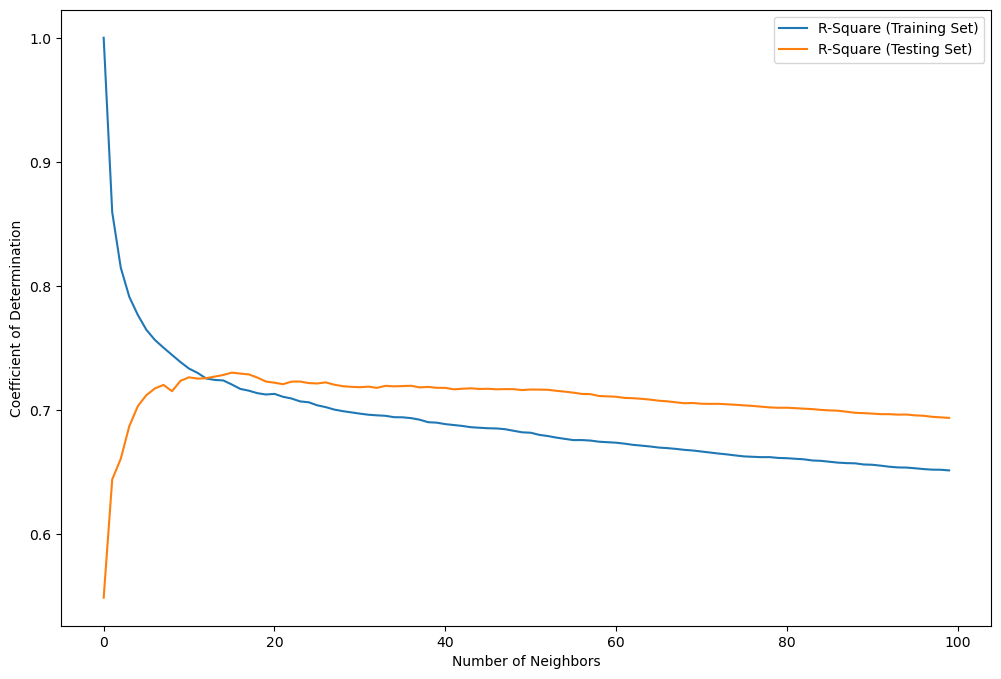

The optimal number of neighbors is 13


In [39]:
# visualizing KNN results
opt_neighbors(x_train   = x_train,
              y_train   = y_train,
              x_test    = x_test,
              y_test    = y_test,
              max_neighbors = 100)

<br>

# Final Model Interpretation

KNN is the model with the highest score and the smallest train-test-gap. Therefore, this model is the best model out of the 5 calculated models. <br>
<br>
Fewer, diverse, non-linear features that are strongly related with revenue predict revenue of a customer the best. KNN is the best model to fit and combine the characteristics of these features. The total amount of products ordered, engagement metrics, and behavioral metrics are combined in this model. These metrics are the most important ones to predict the revenue of a customer. The analysis shows that higher engagement leads to more revenue. Customers who explore more will most likely buy more diverse which leads to higher spendings. The causality between engagement and shopping diversity is not proven by the model but it is a feasible and realistic assumption for the company. Customers who engage less are more likely narrow shoppers that know exactly what they want to buy. They trust higher rated products and care less about comparing similar products, e.g. by price or ingredients, or browsing through the platform to explore new products. Even if higher rated products might be more expensive, these shoppers spend less since they do not cross-buy. <br>
<br>
For the company, the recommendation is to increase engagement on their platform since this is the strongest indicator for revenue. Diversity-driven product suggestions like “frequently bought together”  are a feasible way for the company to increase engagement. This can be applied for every customer, regardless of whether they are already seen as engaged or not. Additionally, for identified narrow shoppers, discounts on buying higher quantities could be a way to increase revenue since these customers tend to buy higher-rated products which oftentimes are pricier due to higher quality. This way, not only cross-selling can be applied, but also upselling can be targeted towards these customers who tend to be less price sensitive. 

<br>Use of GenAI: <br>
ChatGPT was used to facilitate the correct explanation of the methodology and the results of this analysis.